In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
W, d = g.shape

filenames = []
with open('matrices/filenames.txt', 'r') as f:
    for line in f.readlines():
        filenames.append(line.strip())

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
# compute the projections on concept directions
inner_product_with_counterfactual_pairs_g_LOO = []
count = 0
for filename in filenames:
    base_ind, target_ind, base_name, target_name = lrg.get_counterfactual_pairs(filename)
    inner_product_LOO, diff_data = lrg.inner_product_loo(base_ind, target_ind, g)
    inner_product_with_counterfactual_pairs_g_LOO.append(inner_product_LOO)
    count += 1

In [3]:
counts = lrg.count_counterfactual_pairs_LOO(inner_product_with_counterfactual_pairs_g_LOO, concept_names)

for concept, count in counts.items():
    print(f"Concept: {concept}, Counterfactual Pairs: {count}")

Concept: $male \Rightarrow female$, Counterfactual Pairs: 11
Concept: $lower \Rightarrow upper$, Counterfactual Pairs: 34
Concept: $country \Rightarrow capital$, Counterfactual Pairs: 15
Concept: $German \Rightarrow English$, Counterfactual Pairs: 37
Concept: $English \Rightarrow Dutch$, Counterfactual Pairs: 27
Concept: $Swedish \Rightarrow English$, Counterfactual Pairs: 28
Concept: $English \Rightarrow Italian$, Counterfactual Pairs: 27
Concept: $Portuguese \Rightarrow English$, Counterfactual Pairs: 18
Concept: $Spanish \Rightarrow English$, Counterfactual Pairs: 33
Concept: $English \Rightarrow French$, Counterfactual Pairs: 41
Concept: $French \Rightarrow German$, Counterfactual Pairs: 35
Concept: $Spanish \Rightarrow French$, Counterfactual Pairs: 35
Concept: $French \Rightarrow Portuguese$, Counterfactual Pairs: 23
Concept: $Italian \Rightarrow French$, Counterfactual Pairs: 24
Concept: $French \Rightarrow Swedish$, Counterfactual Pairs: 22
Concept: $French \Rightarrow Dutch$, 

In [3]:
# sample random pairs
num_sample = 100000
torch.manual_seed(100)

idx1 = torch.multinomial(torch.ones(W), num_sample, replacement=True)
idx2 = torch.multinomial(torch.ones(W), num_sample, replacement=True)
random_pairs_g = g[idx1,] - g[idx2,]

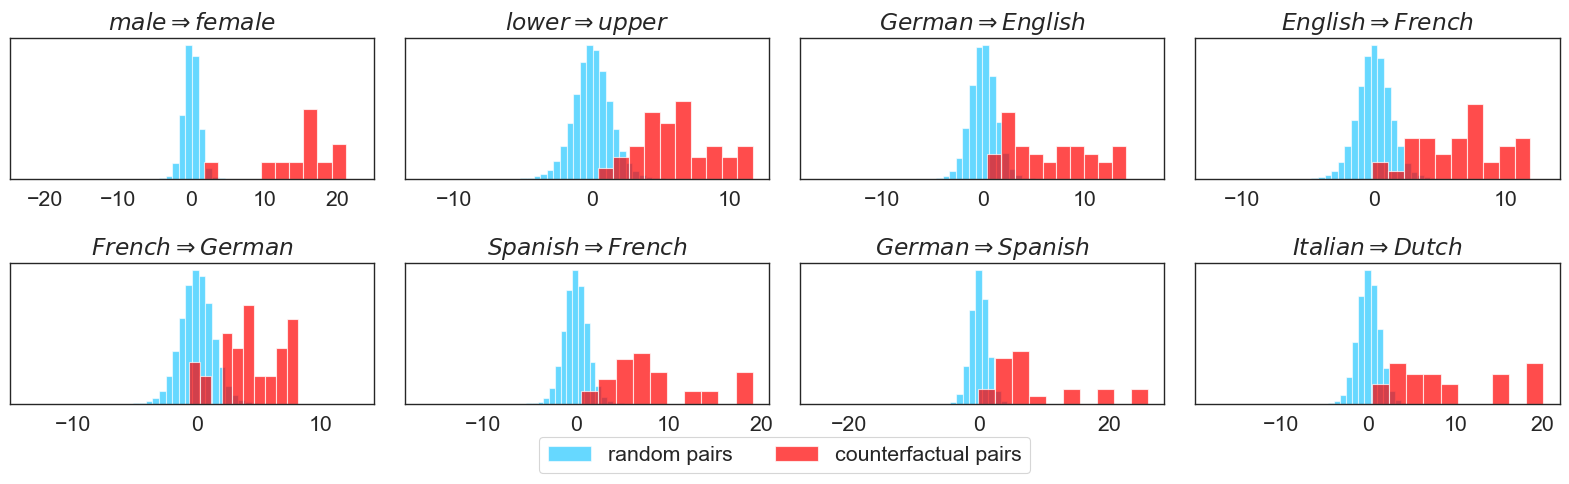

In [4]:
lrg.show_histogram_LOO_partial(inner_product_with_counterfactual_pairs_g_LOO,
                        random_pairs_g, concept_g, concept_names, fig_name = "g")

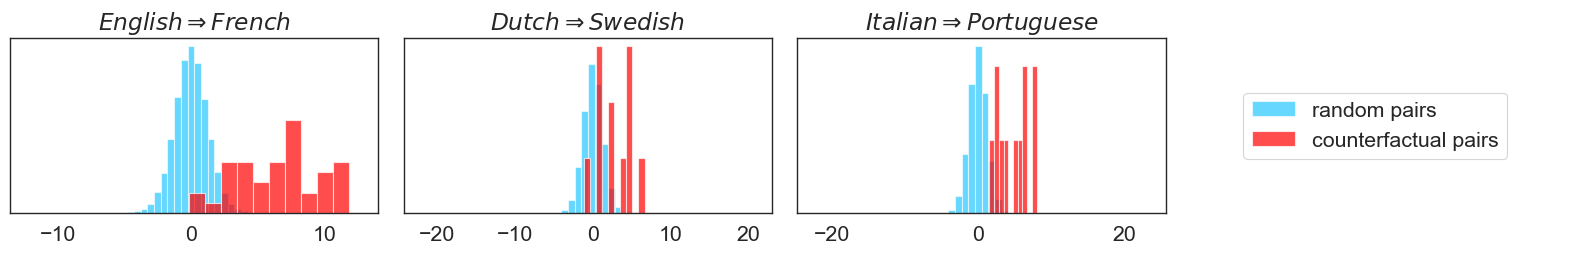

In [4]:
lrg.show_histogram_LOO_partial_small(inner_product_with_counterfactual_pairs_g_LOO,
                        random_pairs_g, concept_g, concept_names, fig_name = "g")

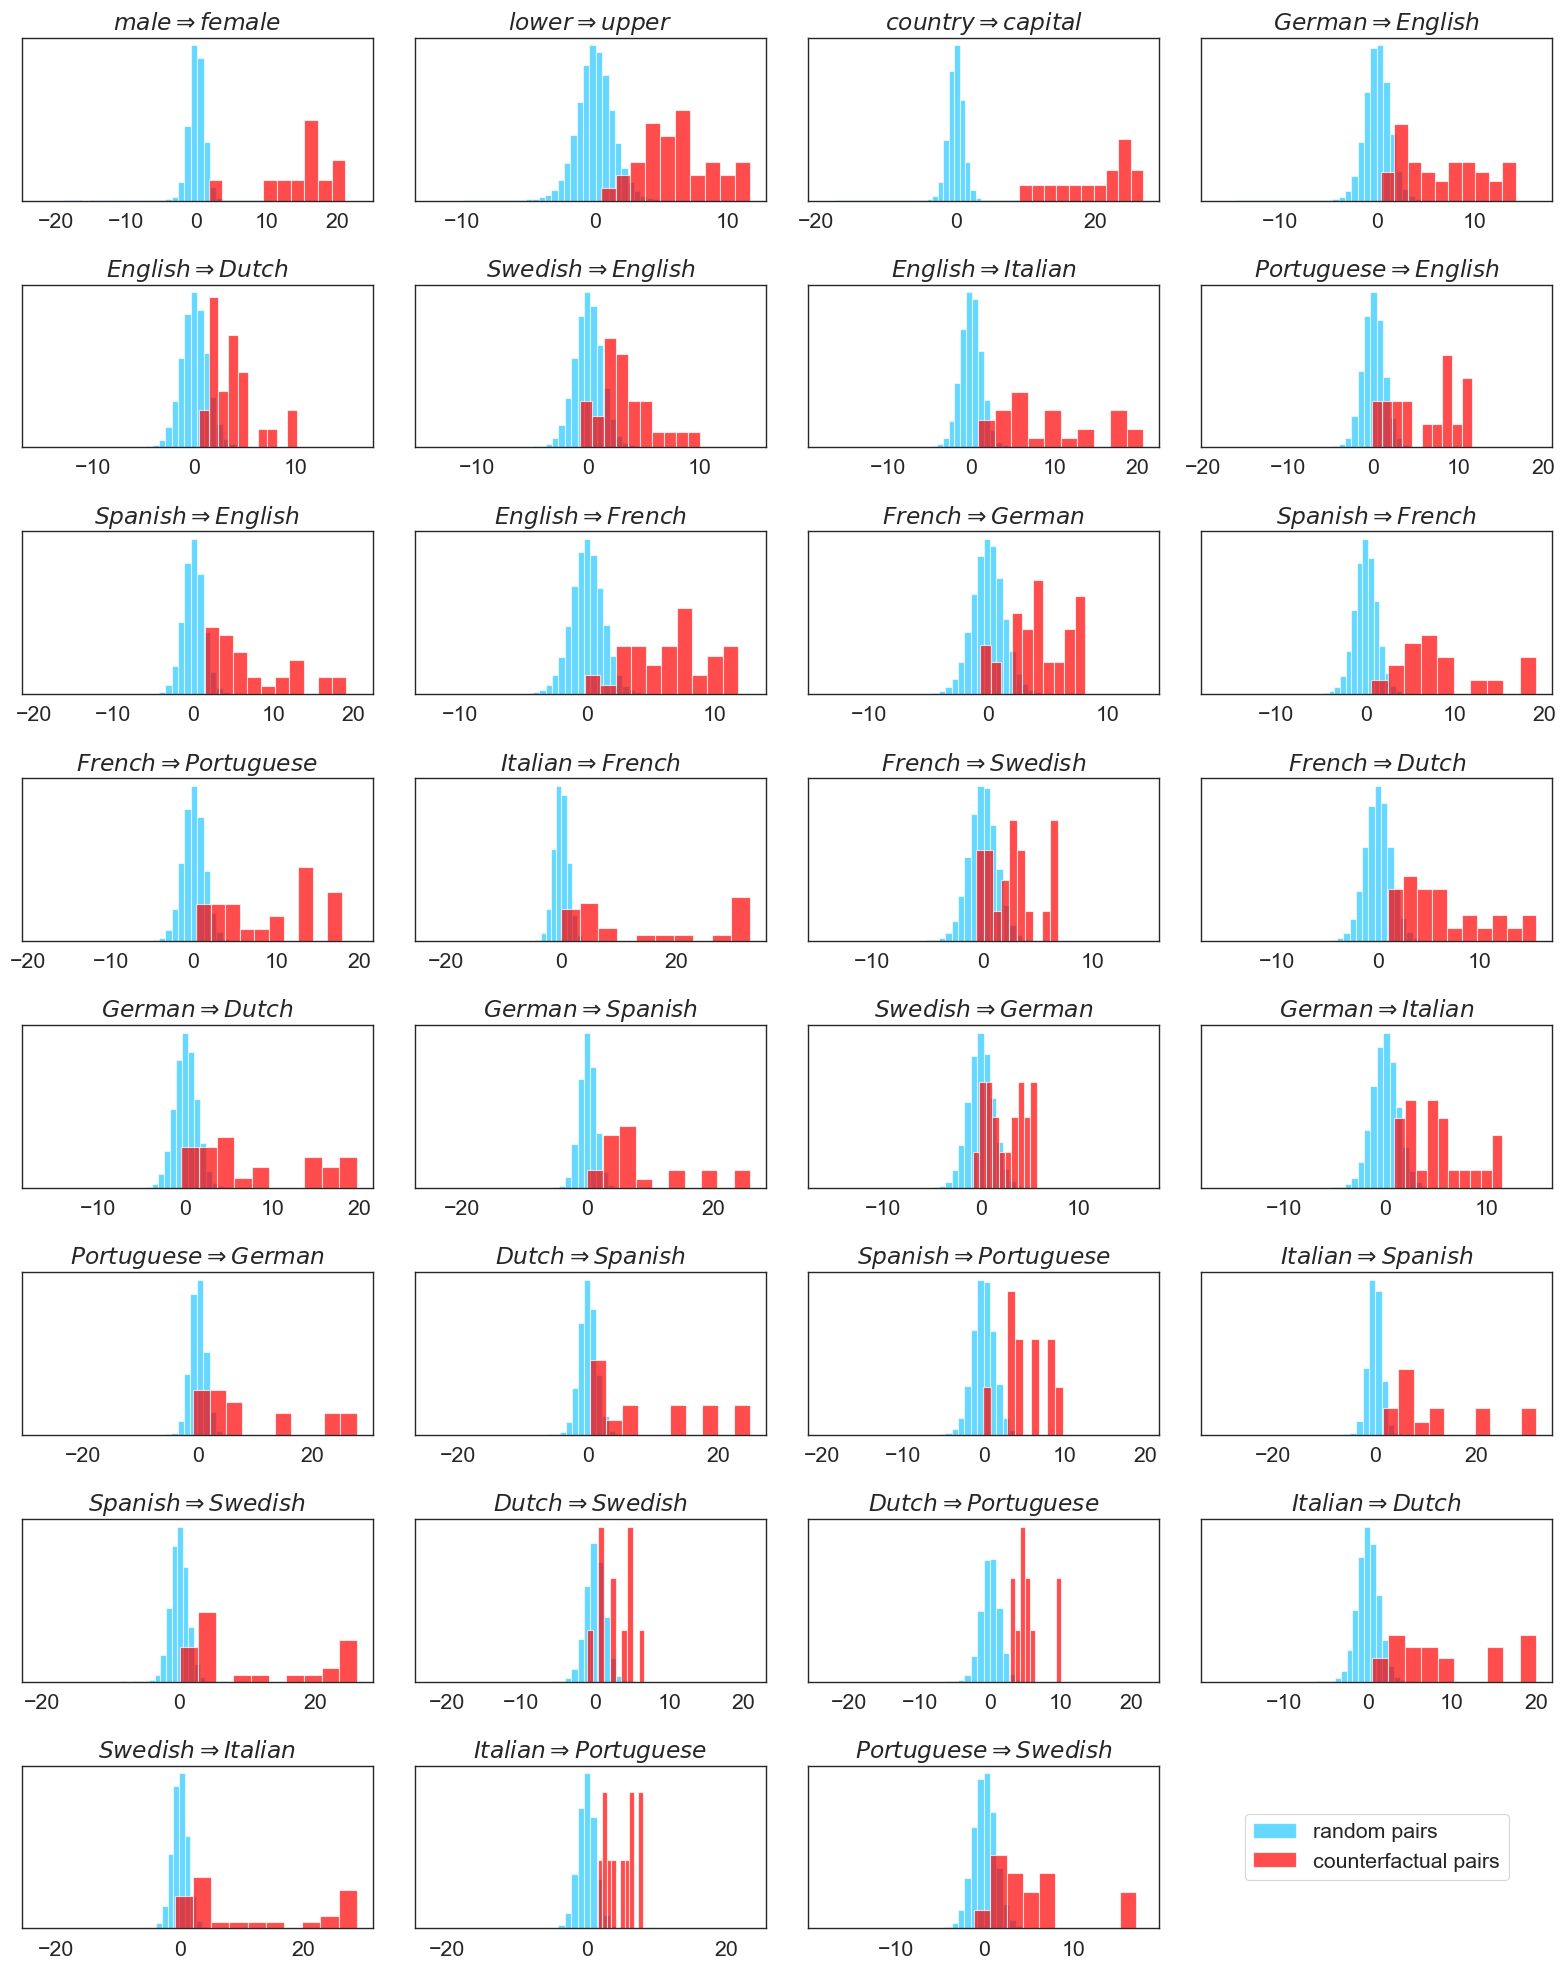

In [ ]:
lrg.show_histogram_LOO(inner_product_with_counterfactual_pairs_g_LOO,
                        random_pairs_g, concept_g, concept_names, fig_name = "g")

In [4]:
means_df = lrg.calculate_means_LOO(inner_product_with_counterfactual_pairs_g_LOO,
                        random_pairs_g,concept_g,concept_names)

means_df.to_excel('means_subspace.xlsx', sheet_name='MeansData', index=True)